# Import Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# <center> EDA
### Preliminary EDA:
    1. Load the provided dataset into a Pandas DataFrame. Display the first 5 rows of the DataFrame to understand its structure.


In [3]:
df = pd.read_csv("customer_lifetime_value_dataset.csv")

    2. Generate a report detailing the data types of each column in the dataset. How many of them are categorical? How many are numerical?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerid              10000 non-null  int64  
 1   firstpurchasedate       10000 non-null  object 
 2   lastpurchasedate        10000 non-null  object 
 3   totalpurchases          10000 non-null  int64  
 4   totalrevenue            10000 non-null  int64  
 5   referralsource          10000 non-null  object 
 6   churnindicator          10000 non-null  int64  
 7   discountsused           10000 non-null  int64  
 8   productcategory         10000 non-null  object 
 9   responsetolastcampaign  10000 non-null  object 
 10  feedbackscore           10000 non-null  float64
 11  preferredpaymentmethod  10000 non-null  object 
 12  supportticketsraised    10000 non-null  object 
 13  hasloyaltycard          10000 non-null  object 
 14  frequency               10000 non-null 

    3. Compute and display basic statistical summaries (mean, median, standard deviation, etc.) for all the numerical columns in the dataset.


In [5]:
df.select_dtypes(include='number').describe()

,customerid,totalpurchases,totalrevenue,churnindicator,discountsused,feedbackscore,frequency
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27519.237400,19.28050,8521.876100,0.498700,2.993600,4.433905,10.053700
std,13118.347463,7.82962,2388.452322,0.500023,2.005283,0.920760,7.098652
min,5000.000000,1.00000,4401.000000,0.000000,0.000000,1.006071,1.000000
25%,16144.750000,13.00000,6427.750000,0.000000,1.000000,4.251318,4.000000
50%,27617.000000,20.00000,8543.000000,0.000000,3.000000,4.985672,9.000000
75%,38967.250000,26.00000,10589.250000,1.000000,5.000000,5.000000,14.000000
max,49994.000000,40.00000,12678.000000,1.000000,6.000000,5.000000,31.000000


    4. Identify any missing values in the dataset. How many missing values are there in each column?

In [6]:
df.isnull().sum()

customerid                0
firstpurchasedate         0
lastpurchasedate          0
totalpurchases            0
totalrevenue              0
referralsource            0
churnindicator            0
discountsused             0
productcategory           0
responsetolastcampaign    0
feedbackscore             0
preferredpaymentmethod    0
supportticketsraised      0
hasloyaltycard            0
frequency                 0
dtype: int64

# Basic Feature Engineering:
1. Create 'avgpurchasevalue' Average value of purchases made by the customer (totalrevenue/totalpurchases).
2. Create 'recency' Number of days since the last purchase.
3. Create 'tenure' Number of days since the customer's first purchase (useful for understanding how long they've been a customer).
4. Create 'avgtimebetweenpurchases': Average number of days between purchases.

In [7]:
# 1. Create 'avgpurchasevalue' Average value of purchases made by the customer (totalrevenue/totalpurchases).
df['firstpurchasedate'] = pd.to_datetime(df['firstpurchasedate'], infer_datetime_format=True)
df['lastpurchasedate'] = pd.to_datetime(df['lastpurchasedate'], infer_datetime_format=True)
df['avgpurchasevalue'] = df['totalrevenue'] / df['totalpurchases']


C:\Users\defaultuser0\AppData\Local\Temp\ipykernel_1892\2462656251.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['firstpurchasedate'] = pd.to_datetime(df['firstpurchasedate'], infer_datetime_format=True)
C:\Users\defaultuser0\AppData\Local\Temp\ipykernel_1892\2462656251.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['lastpurchasedate'] = pd.to_datetime(df['lastpurchasedate'], infer_datetime_format=True)


In [8]:
# 2. Create 'recency' Number of days since the last purchase.

#considering a constant date of '2023-09-01' to create the column.
df['recency'] = (pd.to_datetime('2023-09-01') - df['lastpurchasedate']).dt.days


In [9]:
# 3. Create 'tenure' Number of days since the customer's first purchase (useful for understanding how long they've been a customer).
df['tenure'] = (pd.to_datetime('2023-09-01') - df['firstpurchasedate']).dt.days


In [10]:
# 4. Create 'avgtimebetweenpurchases': Average number of days between purchases.
df['avgtimebetweenpurchases'] = df['tenure'] / df['totalpurchases']


### Univariate Analysis:
    1. Plot histograms for all numerical columns in the dataset. What distributions can you identify based on the histograms?


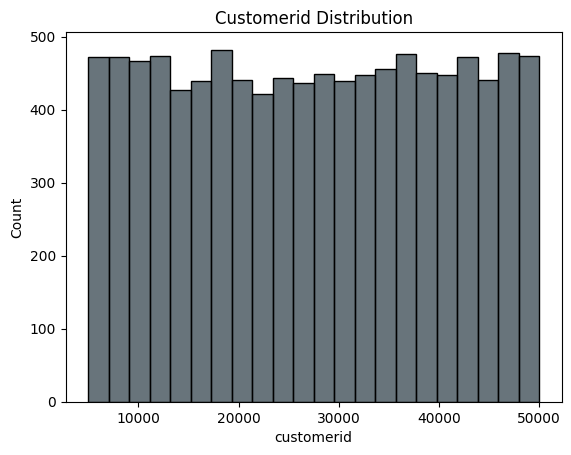

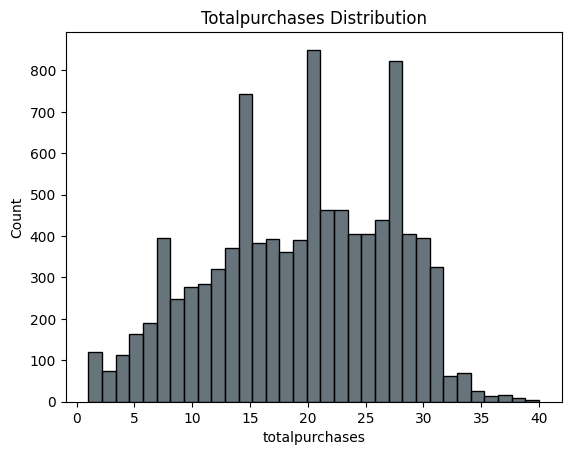

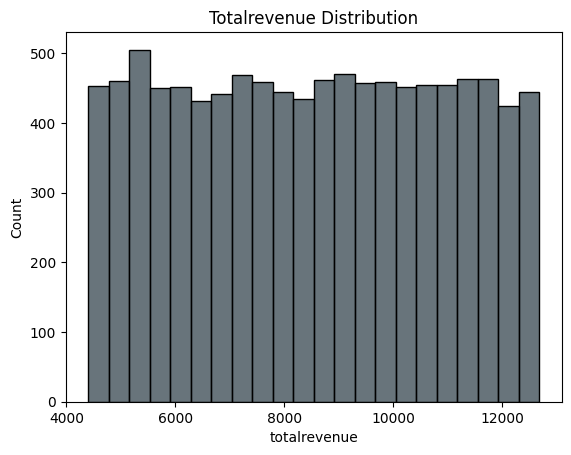

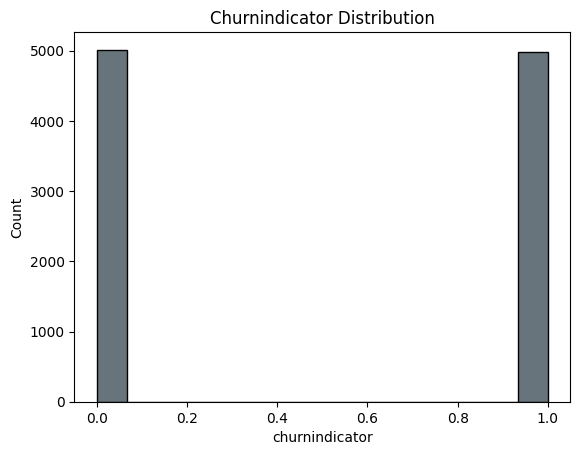

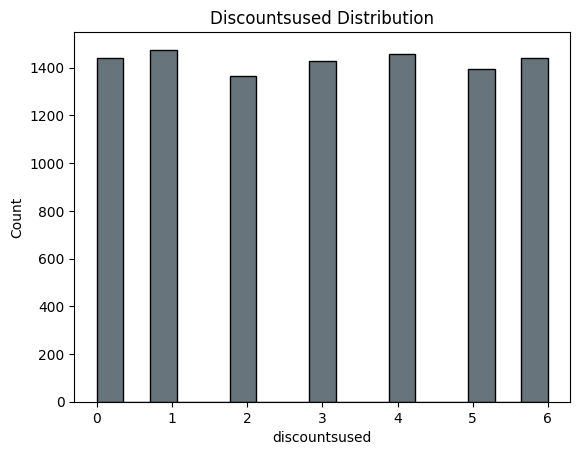

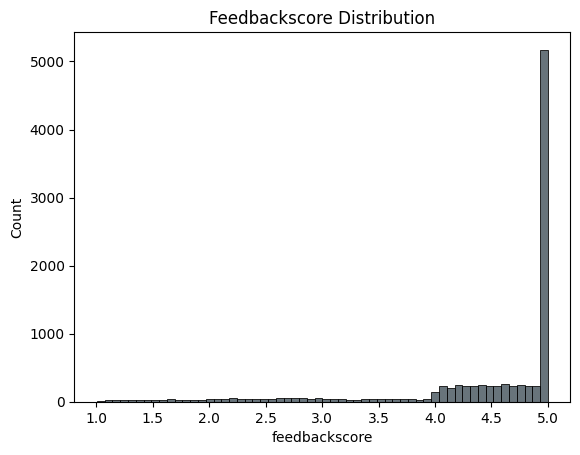

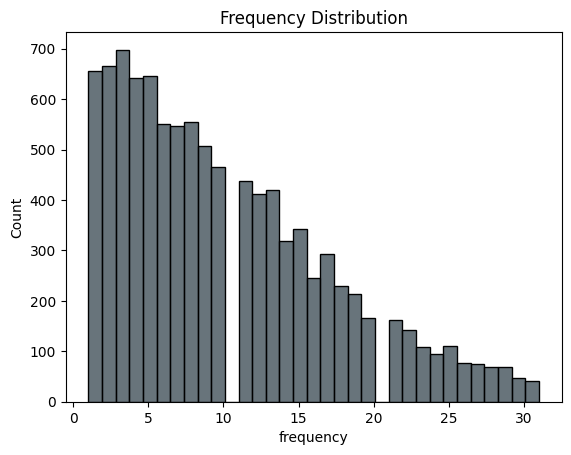

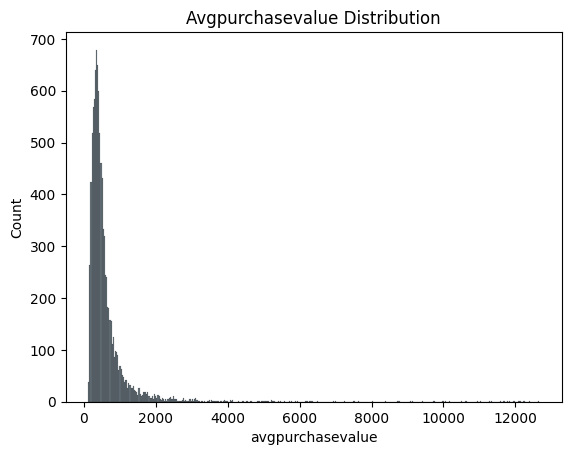

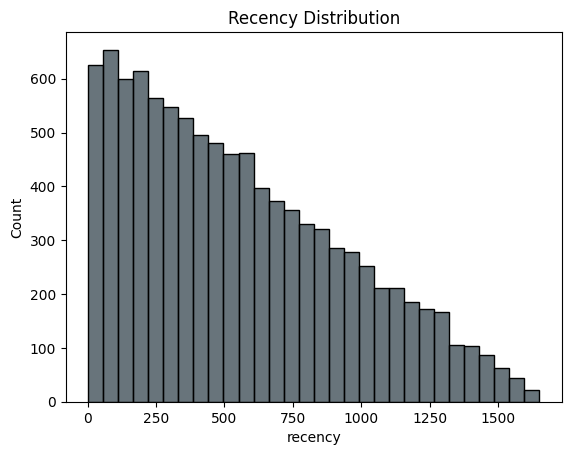

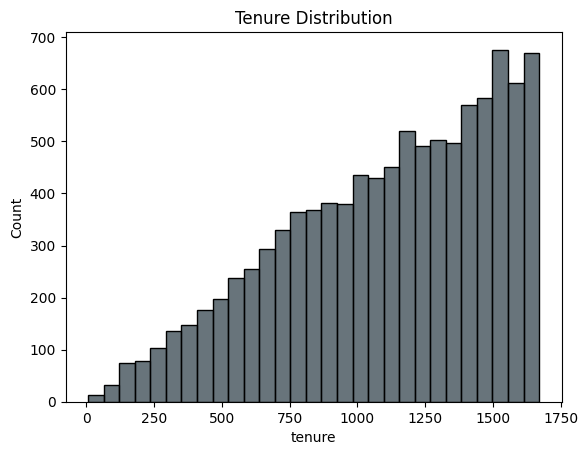

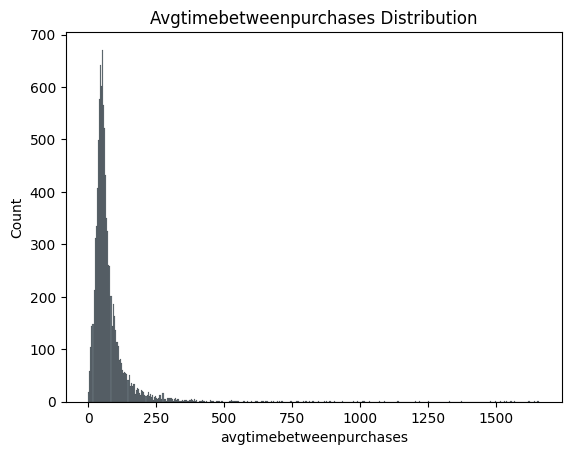

In [11]:
num_histogram = df.select_dtypes(include='number')

for x in num_histogram:
    sns.histplot(data = num_histogram, x = x, color = '#36454F')
    plt.title(f"{x.title()} Distribution")
    plt.show()

    2. For each categorical column, generate bar plots depicting the frequency of each category. Which category dominates in each column?

In [12]:
df['preferredpaymentmethod']= df['preferredpaymentmethod'].astype('category')
df['hasloyaltycard'] = df['hasloyaltycard'].astype('category')
df['referralsource'] = df['referralsource'].astype('category')
df['responsetolastcampaign'] = df['responsetolastcampaign'].astype('category')

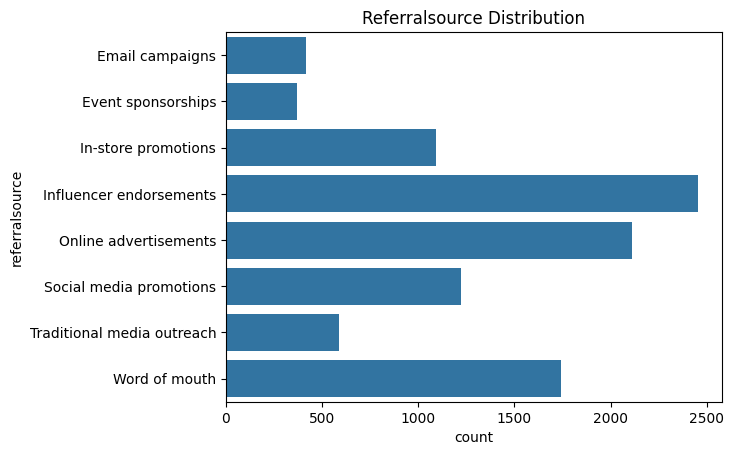

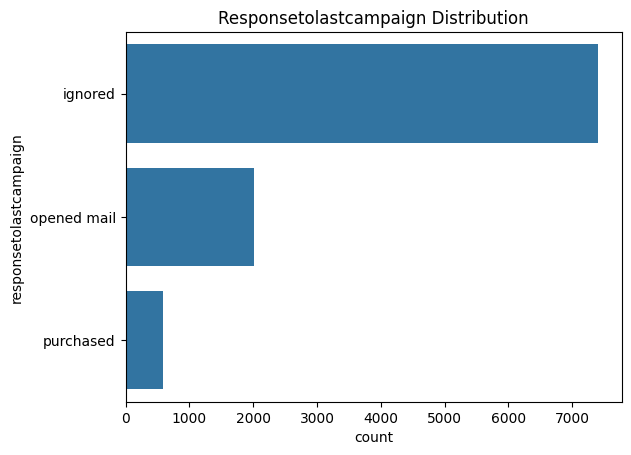

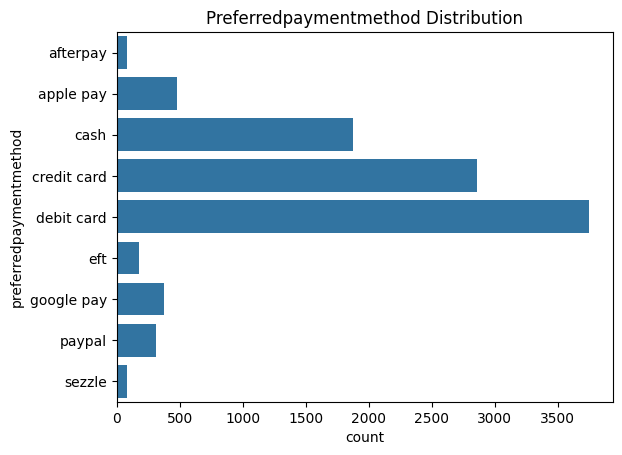

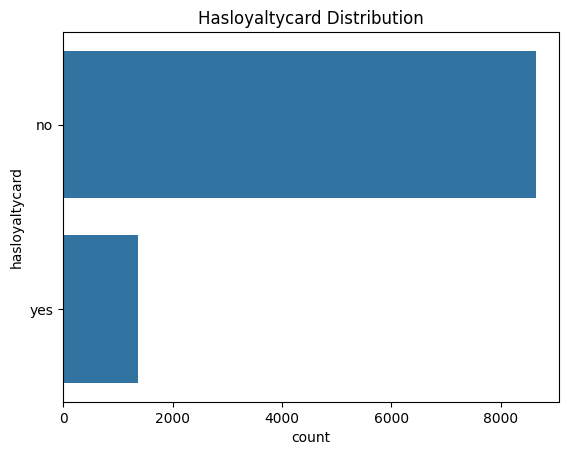

In [13]:
cat_barplot = df.select_dtypes(include=['category'])

for y in cat_barplot:
    sns.barplot(data = cat_barplot[y].value_counts(), orient='h')
    plt.title(f"{y.title()} Distribution")
    plt.show()
    

### Bivariate Analysis:
    1. Construct a correlation matrix for all the numerical features in the dataset. Which pairs of features are highly correlated? Are there any unexpected correlations?


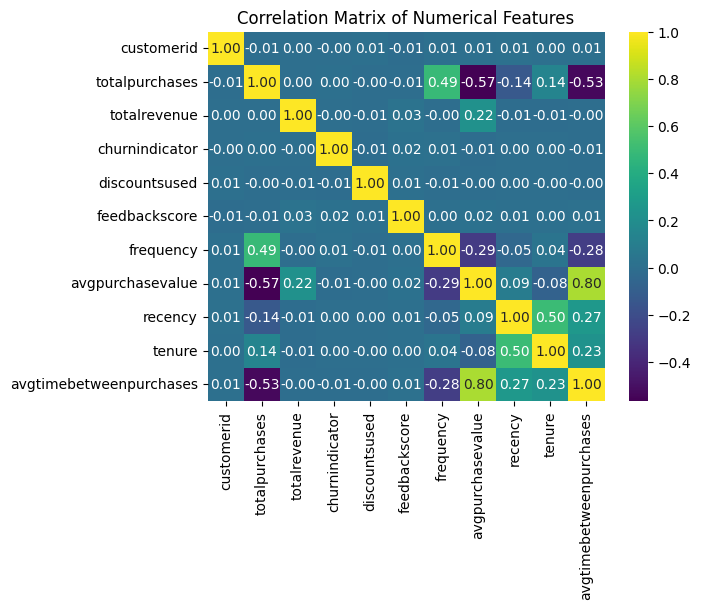

In [14]:
corr_matrix = num_histogram.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

    2. Use box plots to compare the distribution of a chosen numerical column (e.g., TotalRevenue) across different categories in the dataset. Which category tends to have higher values for the chosen numerical column?


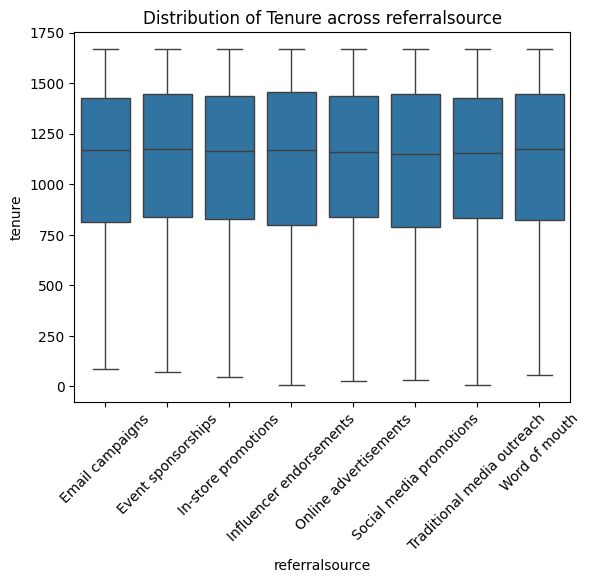

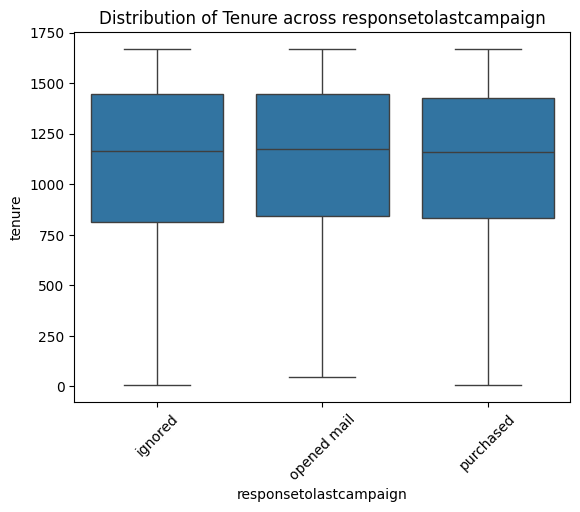

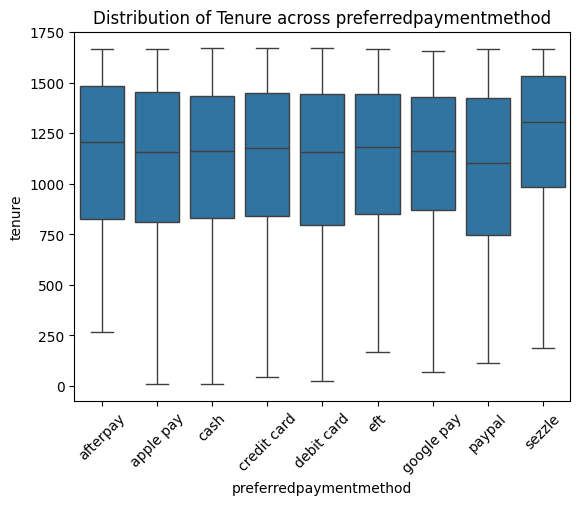

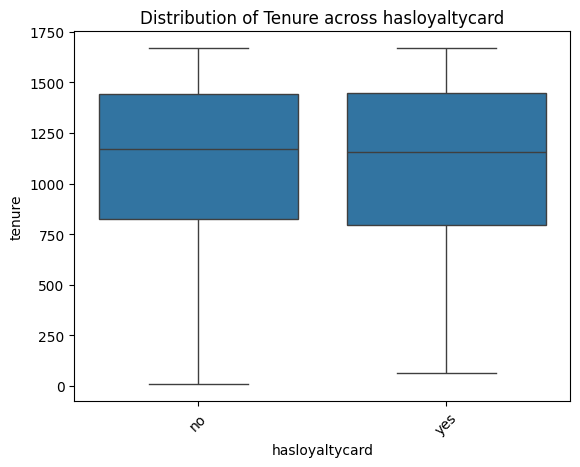

In [15]:
for i in cat_barplot:

    sns.boxplot(data = df, x = i, y = 'tenure')
    plt.title(f'Distribution of Tenure across {i}')
    plt.xlabel(i)
    plt.ylabel('tenure')
    plt.xticks(rotation = 45)
    plt.show()

### Advanced Analysis:
    1. Use a pair plot to visualize relationships between a select set of columns (totalpurchases, totalrevenue, avgpurchasevalue, frequency). Can you identify any clusters or outliers from the plots?


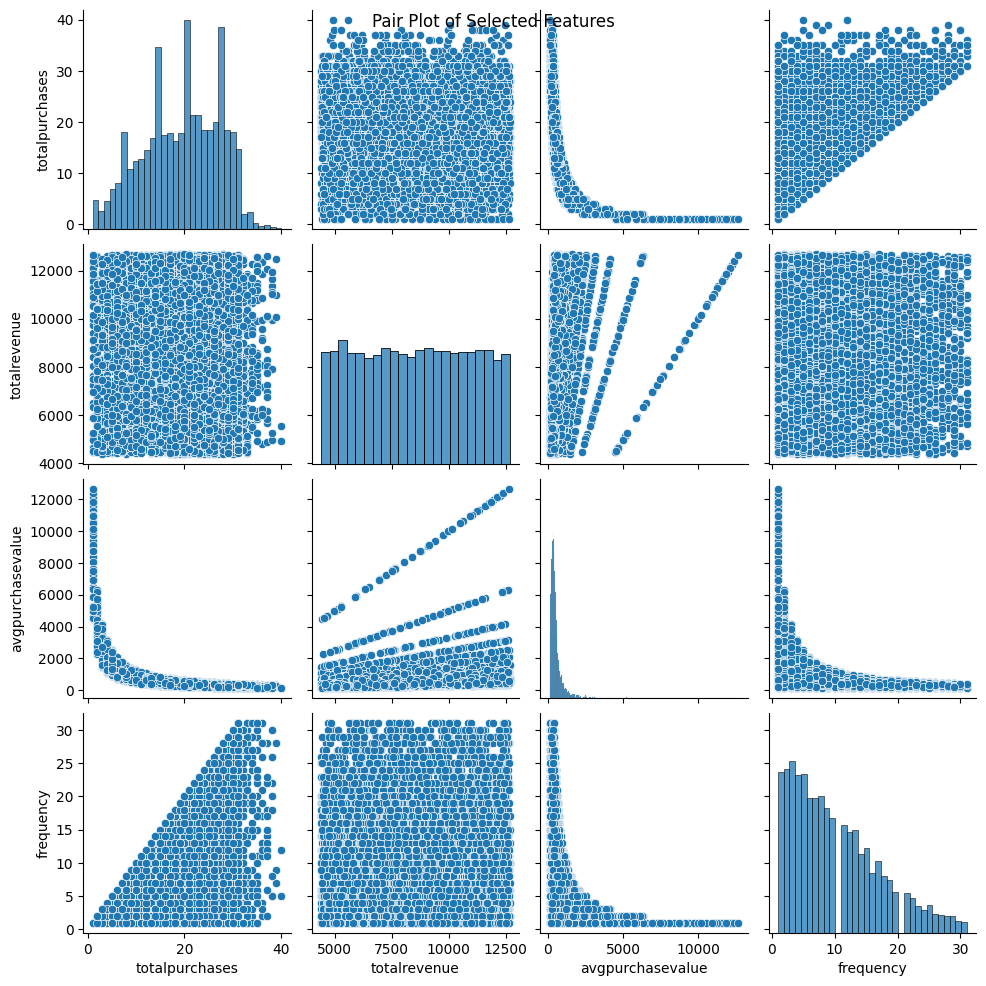

In [16]:
pair_plot = df[['totalpurchases', 'totalrevenue', 'avgpurchasevalue', 'frequency']]
sns.pairplot(pair_plot, kind = 'scatter')
plt.suptitle("Pair Plot of Selected Features")
plt.show()

    3. Use the RFM (Recency, Frequency, Monetary) model to identify the top 5% of customers. List their customerid and associated RFM_Score.


In [17]:
# Assign R, F, M scores using quantiles
df['r_score'] = pd.qcut(df['recency'], 4, labels=[4, 3, 2, 1])
df['freq_score'] = pd.cut(df['frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
df['m_score'] = pd.qcut(df['totalrevenue'], 4, labels=[1, 2, 3, 4])

# Combine RFM scores into a single score (optional)
df['rfm_score'] = df['r_score'].astype(str) + df['freq_score'].astype(str) + df['m_score'].astype(str)

In [18]:
top5_perc = df[['customerid', 'rfm_score']].sort_values(by="rfm_score", ascending=False)
n_rows = int(len(top5_perc) * 0.05)
top5_perc = top5_perc.iloc[:n_rows]

top5_perc


,customerid,rfm_score
4675,44977,444
3945,30220,444
6878,47741,444
9118,10221,444
7342,10152,444
...,...,...
4254,36137,431
8685,10860,431
1556,16378,431
1464,49338,431


    2. Analyze the total revenue trend based on the year of the first purchase. In which year did customers contribute the most to total revenue?

*2023 was the year that first purchase customers contributed the most to the total revenue*

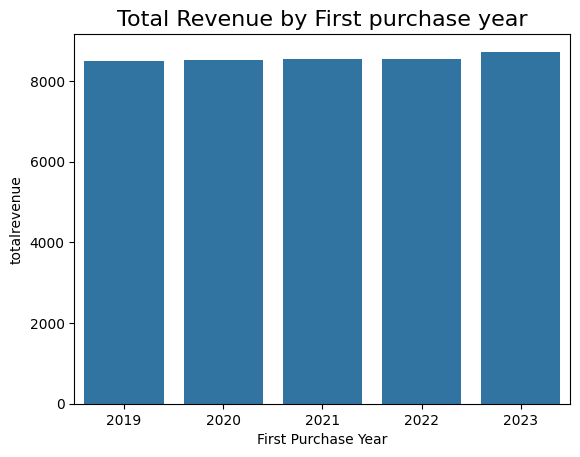

In [19]:
sns.barplot(x=df['firstpurchasedate'].dt.year, y=df['totalrevenue'], errorbar=None)
plt.title("Total Revenue by First purchase year", fontsize = 16)
plt.xlabel("First Purchase Year")
plt.show()

### Multivariate Analysis:
    1. Create a scatter plot of totalrevenue vs. frequency and color the data points based on the churnindicator. What patterns do you observe concerning customer churn?


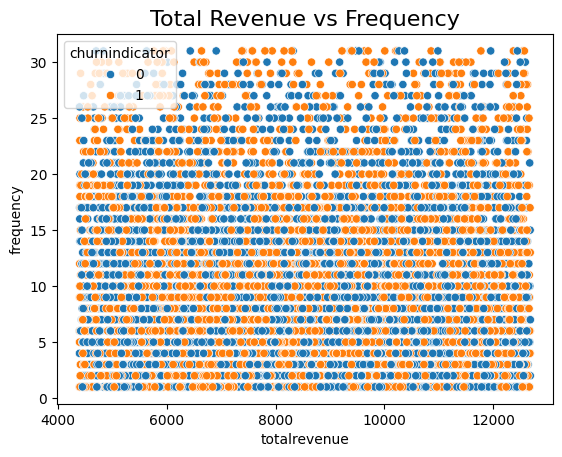

In [20]:
sns.scatterplot(data = df, x = "totalrevenue", y = "frequency", hue="churnindicator")
plt.title("Total Revenue vs Frequency", fontsize=16)
plt.show()

    2. Use the parallel coordinates plot to visualize multi-dimensional relationships using the columns totalpurchases, totalrevenue, avgpurchasevalue, frequency, and hasloyaltycard. Do any patterns emerge based on loyalty card holders?

In [21]:
df['hasloyaltycard'] = df['hasloyaltycard'].map({"no": 0, "yes":1})

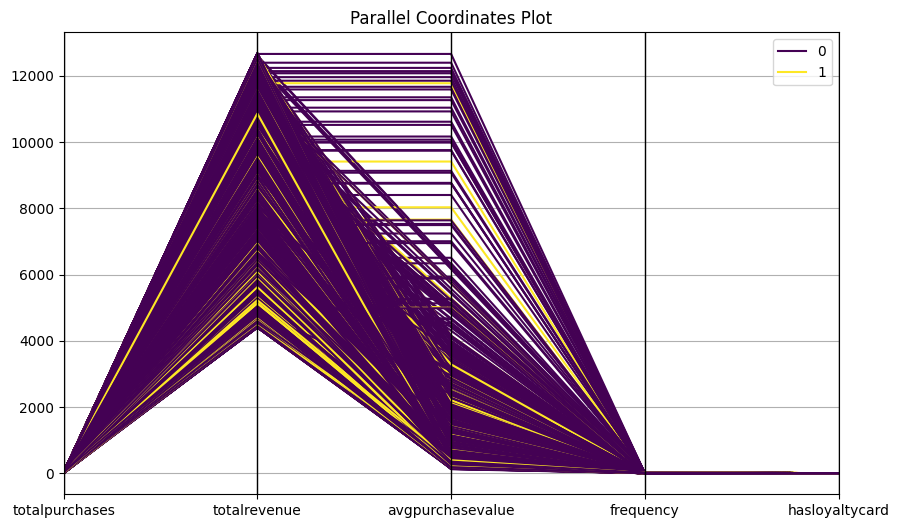

In [22]:
from pandas.plotting import parallel_coordinates

# Creating parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(df, 
                     class_column="hasloyaltycard",
                     cols=['totalpurchases', "totalrevenue", "avgpurchasevalue", "frequency", "hasloyaltycard"],
                     colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

# <center> CLV Modelling

### Ridge Regression:
1. Load the dataset and split it into training and testing sets, keeping 20% of the data for testing. 
2. Implement a Ridge Regression model using the provided features (`Recency`, `Frequency`, `AvgPurchaseValue`) to predict the `TotalRevenue`. 
3. Set the alpha parameter for Ridge Regression to 1.0. How does this value affect the coefficients of the model?
4. Evaluate the model using Mean Squared Error (MSE) on the test set. Report the obtained value.

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df[['recency', 'frequency', 'avgpurchasevalue']]
y = df['totalrevenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Ridge MSE: {mse}")


Ridge MSE: 5519716.832207054


### Random Forest Regressor:
5. Implement a Random Forest Regressor with 100 trees to predict the CLV.
6. Using the feature importance attribute of the Random Forest model, list the features in order of their importance.
7. Evaluate the model's performance using the test set. How does it compare to the Ridge Regression model?

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest MSE: {mse}")


Random Forest MSE: 3572881.24956035


### XGBoost:
11. Implement the XGBoost regressor to predict the CLV. Use 100 estimators for the model.
12. XGBoost offers various hyperparameters to tune. Alter the learning rate of the model. How does it impact the model's performance?
13. Evaluate the model using the test data and compare its MSE with previous models.

In [27]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost MSE: {mse}")


XGBoost MSE: 3569061.1746071214


### Advanced Regression Model

14. Train other regression models like Ridge, Lasso, Decision Trees, Random Forest, and Gradient Boosting to predict totalrevenue.
15. Use cross-validation for model selection and tuning.
16. Evaluate the models using the same metrics as before and compare their performances.

In [29]:
df.head()

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,...,hasloyaltycard,frequency,avgpurchasevalue,recency,tenure,avgtimebetweenpurchases,r_score,freq_score,m_score,rfm_score
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,...,0,7,1667.142857,544,609,87.000000,2,1,4,214
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,...,0,2,263.000000,211,1435,71.750000,4,1,1,411
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,...,0,4,337.586207,574,810,27.931034,2,1,3,213
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,...,0,13,639.400000,376,765,51.000000,3,2,3,323
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,...,0,11,779.538462,540,955,73.461538,2,2,3,223


In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = df[['totalpurchases','churnindicator','discountsused','feedbackscore','frequency',
        'avgpurchasevalue','recency','tenure','avgtimebetweenpurchases','rfm_score']]
y = df["totalrevenue"]

# Splitting the dataset (assuming you haven't already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
ridge = Ridge()
lasso = Lasso()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# List of models
models = [ridge, lasso, decision_tree, random_forest, gradient_boosting]
model_names = ["Ridge", "Lasso", "Decision Tree", "Random Forest", "Gradient Boosting"]

for model, name in zip(models, model_names):
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Printing metrics
    print(f"{name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}\n")



Ridge:
Mean Squared Error: 4591378.955040804
Mean Absolute Error: 1830.8476929921578
Root Mean Squared Error: 2142.7503249424103
R-squared: 0.2150585527697214

Lasso:
Mean Squared Error: 4591225.128800251
Mean Absolute Error: 1830.8407940914253
Root Mean Squared Error: 2142.7144300630102
R-squared: 0.2150848508803901

Decision Tree:
Mean Squared Error: 16309.968
Mean Absolute Error: 56.517
Root Mean Squared Error: 127.71048508247081
R-squared: 0.9972116503535079

Random Forest:
Mean Squared Error: 15358.758738249999
Mean Absolute Error: 43.99713499999999
Root Mean Squared Error: 123.93045928362405
R-squared: 0.9973742689440986

Gradient Boosting:
Mean Squared Error: 120721.22561308538
Mean Absolute Error: 245.06858781134366
Root Mean Squared Error: 347.44960154400144
R-squared: 0.9793615176459974



### Hyperparameter Tuning:

17. For models that have hyperparameters, use techniques like GridSearchCV or RandomizedSearchCV to find optimal values.
18. Re-evaluate the models using the optimized hyperparameters.

In [ ]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# # Assuming df is your DataFrame
# X = df[['totalpurchases','churnindicator','discountsused','feedbackscore','frequency',
#         'avgpurchasevalue','recency','tenure','avgtimebetweenpurchases','RFM_Score']]
# y = df["totalrevenue"]

# # Splitting the dataset (assuming you haven't already)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Setting hyperparameters grids for each model

# # 1. Ridge
# ridge_params = {
#     'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
#     'normalize': [True, False],
#     'max_iter': [500, 1000, 1500]
# }

# # 2. Lasso
# lasso_params = {
#     'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
#     'normalize': [True, False],
#     'max_iter': [500, 1000, 1500]
# }

# # 3. Decision Tree
# # decision_tree_params = {
# #     'criterion': ['mse', 'mae'],
# #     'splitter': ['best', 'random'],
# #     'max_depth': [None, 5, 10, 15],
# #     'min_samples_split': [2, 5, 10],
# #     'min_samples_leaf': [1, 2, 4]
# # }

# # 4. Random Forest
# random_forest_params = {
#     'n_estimators': [50, 100, 150],
#     'criterion': ['mse', 'mae'],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # 5. Gradient Boosting
# gradient_boosting_params = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'max_depth': [3, 5, 10, 15],
#     'subsample': [0.5, 0.7, 0.9, 1],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Creating a list of models and their parameters
# models_params = [
#     (Ridge(), ridge_params),
#     (Lasso(), lasso_params),
# #     (DecisionTreeRegressor(random_state=42), decision_tree_params),
#     (RandomForestRegressor(random_state=42, verbose=2), random_forest_params),
#     (GradientBoostingRegressor(random_state=42, verbose=2), gradient_boosting_params)
# ]

# # Hyperparameter tuning using GridSearchCV
# for model, params in models_params:
#     grid = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
#     grid_result = grid.fit(X_train, y_train)
    
#     # Print the best parameters and scores
#     print(f"Best Parameters for {type(model).__name__}: {grid_result.best_params_}")
#     print(f"Best Cross-Validation Score for {type(model).__name__}: {-grid_result.best_score_}\n")



### Feature Importance:

19. For tree-based models like Random Forest and Gradient Boosting, extract feature importance scores.
20. Analyze and interpret the top features affecting totalrevenue.

In [40]:
print(pd.Series(decision_tree.feature_importances_, decision_tree.feature_names_in_).sort_values(ascending=False))
print()
print(pd.Series(random_forest.feature_importances_, random_forest.feature_names_in_).sort_values(ascending=False))
print()
print(pd.Series(gradient_boosting.feature_importances_, gradient_boosting.feature_names_in_).sort_values(ascending=False))


avgpurchasevalue           0.674706
totalpurchases             0.301798
rfm_score                  0.022578
recency                    0.000279
tenure                     0.000191
discountsused              0.000130
frequency                  0.000120
avgtimebetweenpurchases    0.000111
feedbackscore              0.000072
churnindicator             0.000015
dtype: float64

avgpurchasevalue           0.654635
totalpurchases             0.305710
rfm_score                  0.032982
recency                    0.002646
tenure                     0.001456
avgtimebetweenpurchases    0.001084
feedbackscore              0.000514
frequency                  0.000443
discountsused              0.000383
churnindicator             0.000147
dtype: float64

avgpurchasevalue           0.688638
totalpurchases             0.280593
rfm_score                  0.028688
recency                    0.001087
frequency                  0.000938
tenure                     0.000052
churnindicator             0.000